In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import dataframe_image as dfi
import matplotlib.pyplot as plt

# 禁用科学计数法，小数保留4位
pd.set_option('display.float_format',lambda x : '%.4f' % x)
sns.set_style("whitegrid")
np.set_printoptions(precision=5, suppress=True,
                   formatter={'float': lambda x: f'{x:6.3f}'})     
     
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False


In [2]:
data = pd.read_csv('creditcard.csv')

In [5]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [15]:
dfi.export(data[['Time','V1','V2','V3','V4','V26','V27','V28','Amount','Class']].head(),'data_info.png', table_conversion="matplotlib",dpi=400) 

In [29]:
data_0 = data[data.Class==0]
data_1 = data[data.Class==1]
corr_0 = data_0.corr(method='pearson')
corr_1 = data_1.corr(method='pearson')

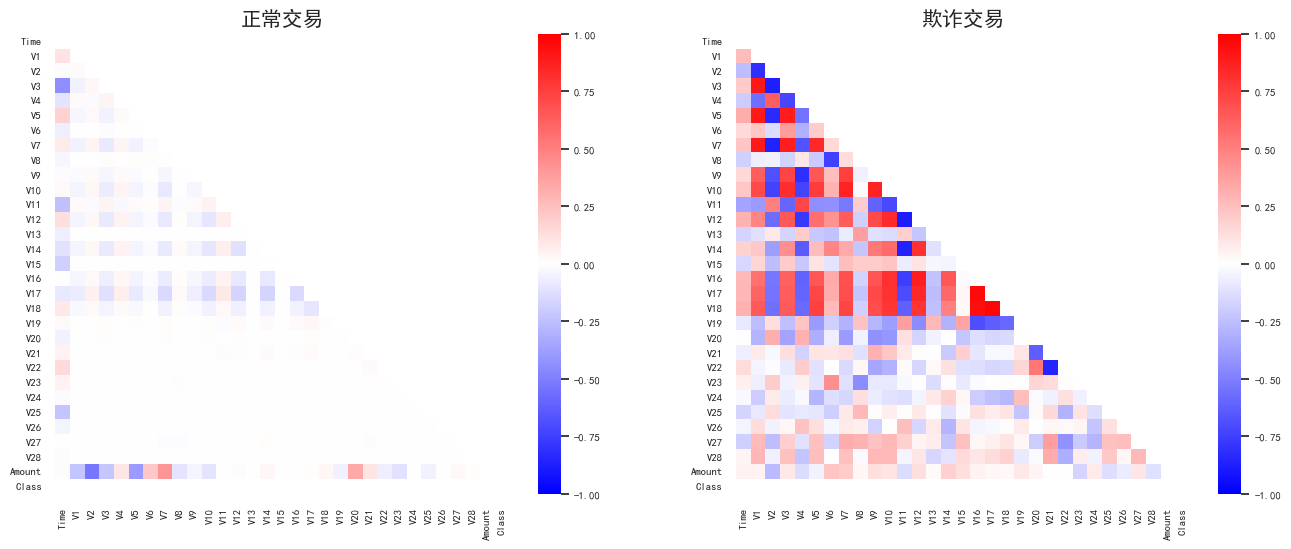

In [65]:
plt.figure(figsize=(13,5))
plt.subplots_adjust(left=0, top= 0.96, right = 0.96, bottom = 0.04, wspace = 0.2, hspace = 0.7)

plt.subplot(1,2,1)
plt.title('正常交易',fontsize = 15)
# 设置展示一半
mask = np.zeros_like(corr_0)
mask[np.triu_indices_from(mask)] = True  # np.triu_indices 上三角矩阵
with sns.axes_style("white"):
    sns.heatmap(corr_0,
                cmap='bwr',  # 设置热力图颜色
                annot=False,  # 显示相关系数的数据
                mask = mask,
                vmin=-1, vmax=1  # 设置数值最小值和最大值
                )


plt.subplot(1,2,2)
plt.title('欺诈交易',fontsize = 15)
# 设置展示一半
mask = np.zeros_like(corr_1)
mask[np.triu_indices_from(mask)] = True  # np.triu_indices 上三角矩阵
with sns.axes_style("white"):
    sns.heatmap(corr_1,
                cmap='bwr',  # 设置热力图颜色
                annot=False,  # 显示相关系数的数据
                mask=mask,
                vmin=-1, vmax=1  # 设置数值最小值和最大值
                )
plt.show()


# plt.savefig("我是废强热力图.png",dpi=600)#保存图片，分辨率为600


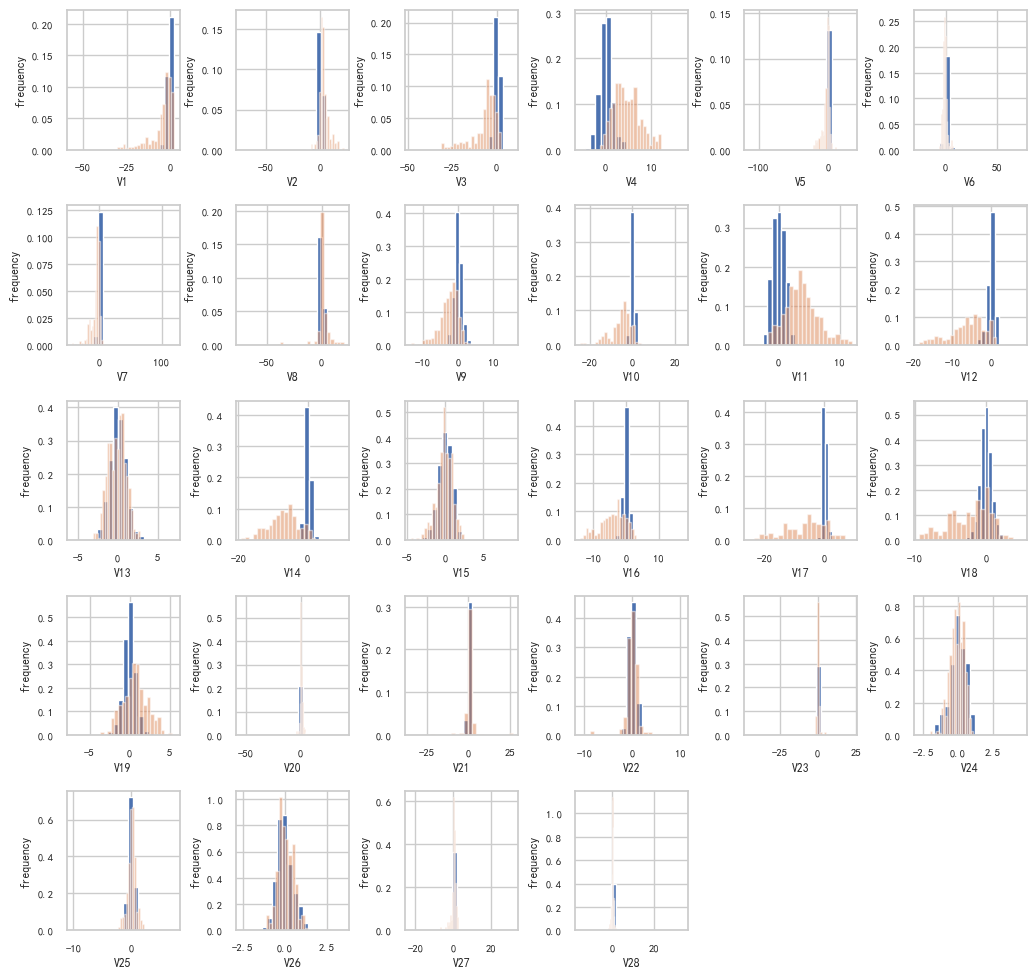

In [83]:
plt.figure(figsize=(10,10))
# 设定子图间距, left < right, top > bottom, 数字表示窗口大小的比例（如下则子图间距为窗口大小的1%） 
plt.subplots_adjust(left=0, top= 0.96, right = 0.96, bottom = 0.04, wspace = 0.5, hspace = 0.4)

for i in np.arange(len(data_0.columns)-3):
    plt.subplot(5,6,i+1)
    plt.hist(data_0.loc[:,'V1':'V28'].iloc[:,i],density=True,bins=20)
    plt.hist(data_1.loc[:,'V1':'V28'].iloc[:,i],density=True,bins=20,alpha = 0.5)
    plt.xlabel(data_0.loc[:,'V1':'V28'].columns[i])
    plt.ylabel('frequency')

plt.show()

In [84]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0000,-11.8811,10.0718,-9.8348,-2.0667,-5.3645,-2.6068,-4.9182,7.3053,1.9144,...,0.2135,0.1119,1.0145,-0.5093,1.4368,0.2500,0.9437,0.8237,0.7700,0
284803,172787.0000,-0.7328,-0.0551,2.0350,-0.7386,0.8682,1.0584,0.0243,0.2949,0.5848,...,0.2142,0.9244,0.0125,-1.0162,-0.6066,-0.3953,0.0685,-0.0535,24.7900,0
284804,172788.0000,1.9196,-0.3013,-3.2496,-0.5578,2.6305,3.0313,-0.2968,0.7084,0.4325,...,0.2320,0.5782,-0.0375,0.6401,0.2657,-0.0874,0.0045,-0.0266,67.8800,0
284805,172788.0000,-0.2404,0.5305,0.7025,0.6898,-0.3780,0.6237,-0.6862,0.6791,0.3921,...,0.2652,0.8000,-0.1633,0.1232,-0.5692,0.5467,0.1088,0.1045,10.0000,0


In [86]:
lst = data.columns.tolist()
lst = [i for i in lst if i not in ['V8','V13','V15','V20','V21','V22','V24','V25','V26','V27','V28']]

In [100]:
data_new = data[lst]
data_new.to_csv('data_new.csv')